# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['weather'][0]['main']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | licheng
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | camarinas
Processing Record 5 of Set 1 | shevchenko
Processing Record 6 of Set 1 | sinan
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | tolanaro
Processing Record 9 of Set 1 | manokwari
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | kapuskasing
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | mary
Processing Record 18 of Set 1 | clewiston
Processing Record 19 of Set 1 | puerto armuelles
Processing Record 20 of Set 1 | leiyang
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | general

Processing Record 38 of Set 4 | keflavik
Processing Record 39 of Set 4 | sabzevar
Processing Record 40 of Set 4 | tsiombe
Processing Record 41 of Set 4 | ulladulla
Processing Record 42 of Set 4 | puerto baquerizo moreno
Processing Record 43 of Set 4 | itanhem
Processing Record 44 of Set 4 | labytnangi
Processing Record 45 of Set 4 | port saint john's
Processing Record 46 of Set 4 | san jose del cabo
Processing Record 47 of Set 4 | vorgashor
Processing Record 48 of Set 4 | ambodifotatra
Processing Record 49 of Set 4 | ubinskoye
Processing Record 0 of Set 5 | al bawiti
Processing Record 1 of Set 5 | dragasani
Processing Record 2 of Set 5 | tondi
Processing Record 3 of Set 5 | berezovyy
Processing Record 4 of Set 5 | myanaung
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | charters towers
Processing Record 7 of Set 5 | ekibastuz
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 | satipo
Processing Record 10 of Set 5 | parkes
Processing Record 11 of Set 

Processing Record 28 of Set 8 | saint-joseph
Processing Record 29 of Set 8 | belozersk
Processing Record 30 of Set 8 | maintirano
Processing Record 31 of Set 8 | nadym
Processing Record 32 of Set 8 | berdigestyakh
Processing Record 33 of Set 8 | tanque verde
Processing Record 34 of Set 8 | achinsk
Processing Record 35 of Set 8 | capao da canoa
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | ingeniero guillermo n. juarez
Processing Record 38 of Set 8 | selfoss
Processing Record 39 of Set 8 | tazovsky
Processing Record 40 of Set 8 | gemena
Processing Record 41 of Set 8 | ilebo
Processing Record 42 of Set 8 | ixtapa
Processing Record 43 of Set 8 | guijuelo
Processing Record 44 of Set 8 | dzhambeyty
Processing Record 45 of Set 8 | orapa
Processing Record 46 of Set 8 | cole harbour
Processing Record 47 of Set 8 | miasskoye
Processing Record 48 of Set 8 | toga village
City not found. Skipping...
Processing Record 49 of Set 8 | kumeny
Processing Record 0 of Set 9 | sao

Processing Record 20 of Set 12 | gumdag
Processing Record 21 of Set 12 | puerto santa
Processing Record 22 of Set 12 | korla
Processing Record 23 of Set 12 | sao vicente
Processing Record 24 of Set 12 | adiake
Processing Record 25 of Set 12 | salinas
Processing Record 26 of Set 12 | tazacorte
Processing Record 27 of Set 12 | crane
Processing Record 28 of Set 12 | dzhalagash
Processing Record 29 of Set 12 | vallegrande
Processing Record 30 of Set 12 | asau village
City not found. Skipping...
Processing Record 31 of Set 12 | santa ana
Processing Record 32 of Set 12 | verkhnevilyuysk
Processing Record 33 of Set 12 | save
Processing Record 34 of Set 12 | heunghae
Processing Record 35 of Set 12 | candelaria
Processing Record 36 of Set 12 | port macquarie
Processing Record 37 of Set 12 | maxixe
Processing Record 38 of Set 12 | gunjur
Processing Record 39 of Set 12 | skovorodino
Processing Record 40 of Set 12 | fortuna
Processing Record 41 of Set 12 | ribeira do pombal
Processing Record 42 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.34,84,Clouds,5.81,NZ,1698769712
1,licheng,23.2955,113.8284,26.69,53,Clouds,2.48,CN,1698704938
2,albany,42.6001,-73.9662,5.85,82,Clouds,3.74,US,1698665201
3,camarinas,43.1311,-9.1817,12.88,80,Clouds,7.48,ES,1698736172
4,shevchenko,48.5000,35.0000,12.28,73,Clouds,4.31,UA,1698726211


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/citiesDataApi.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

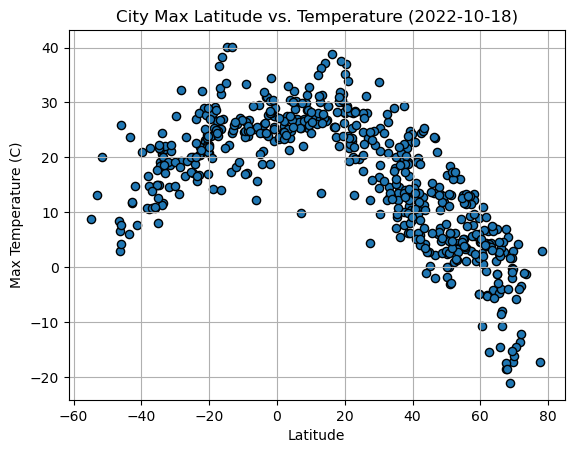

In [16]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
# Incorporate the other graph properties
# YOUR CODE HERE
latVTemp = pd.DataFrame({
    "Latitude":lat,
    "Max Temperature (C)":temp
})
latVTemp.plot(kind="scatter",x="Latitude",y="Max Temperature (C)",grid=True,title ="City Max Latitude vs. Temperature (2022-10-18)", edgecolor='black',s=35)
plt.show()

# Save the figure

plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

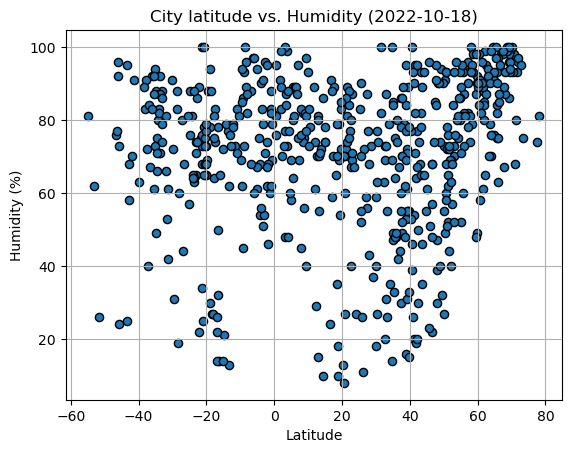

In [17]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
humidity = city_data_df["Humidity"]
# Incorporate the other graph properties
# YOUR CODE HERE

latVHumidity = pd.DataFrame({
    "Latitude":lat,
    "Humidity (%)": humidity
})
latVHumidity.plot(kind ="scatter", x="Latitude",y="Humidity (%)", grid=True, title="City latitude vs. Humidity (2022-10-18)",edgecolor='black',s=35)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

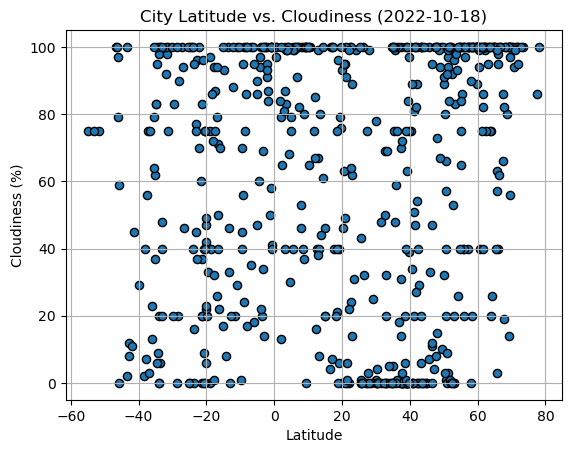

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloudy = city_data_df["Cloudiness"]
# Incorporate the other graph properties
# YOUR CODE HERE
latVCloudy = pd.DataFrame({
    "Latitude":lat,
    "Cloudiness (%)": cloudy
})
latVCloudy.plot(kind="scatter",x="Latitude",y="Cloudiness (%)",grid=True,title ="City Latitude vs. Cloudiness (2022-10-18)", edgecolor='black', s=35)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

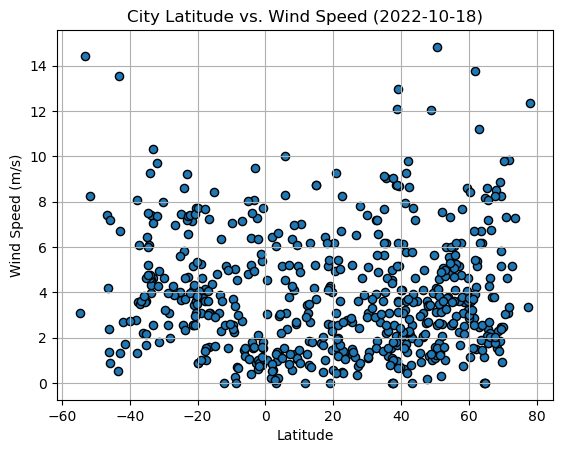

In [19]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
windSpeed = city_data_df["Wind Speed"]
# Incorporate the other graph properties
# YOUR CODE HERE
latVWind = pd.DataFrame({
    "Latitude": lat,
    "Wind Speed (m/s)": windSpeed
})

latVWind.plot(kind="scatter",x="Latitude", y="Wind Speed (m/s)", grid=True,title="City Latitude vs. Wind Speed (2022-10-18)",edgecolor='black',s=35)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
lat = northern_hemi_df["Lat"]
temp =northern_hemi_df["Max Temp"]
n_slope, n_int, n_r, n_p, n_std_err = stats.linregress(lat, temp)

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7161472181434125


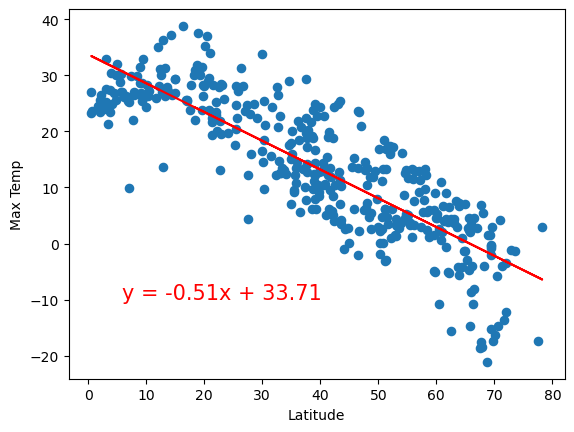

In [24]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

nFit = n_slope * lat + n_int
regressValues = lat * n_slope + n_int

print(f"The r-value is {n_r**2}")
northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp",s=35)
plt.xlabel("Latitude")
line_eq = "y = " + str(round(n_slope,2)) + "x + " + str(round(n_int,2))
plt.plot(lat, nFit, color='r')
plt.annotate(line_eq,(5.8,-10),fontsize=15, color="red")

plt.show()

The r-value is 0.4121057168607252


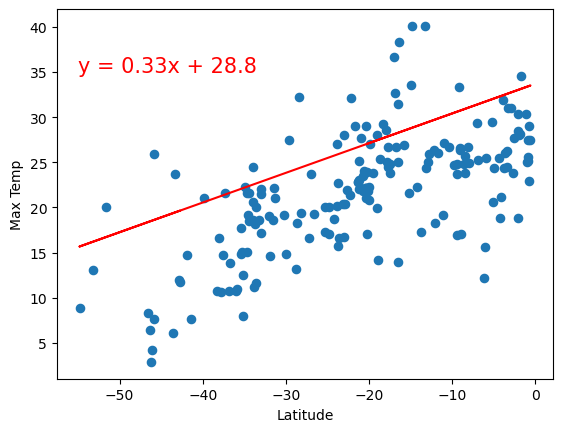

In [25]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
latSouthern = southern_hemi_df["Lat"]
tempSouthern =southern_hemi_df["Max Temp"]
s_slope, s_int, s_r, s_p, s_std_err = stats.linregress(latSouthern, tempSouthern)
sFit = s_slope * latSouthern + n_int
regressValuesSouthern = latSouthern * s_slope + s_int

print(f"The r-value is {s_r**2}")
southern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp",s=35)
plt.xlabel("Latitude")
line_eq_southern = "y = " + str(round(s_slope,2)) + "x + " + str(round(s_int,2))
plt.plot(latSouthern, sFit, color='r')
plt.annotate(line_eq_southern,(-55,35),fontsize=15, color="red")

plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.05689741545789608


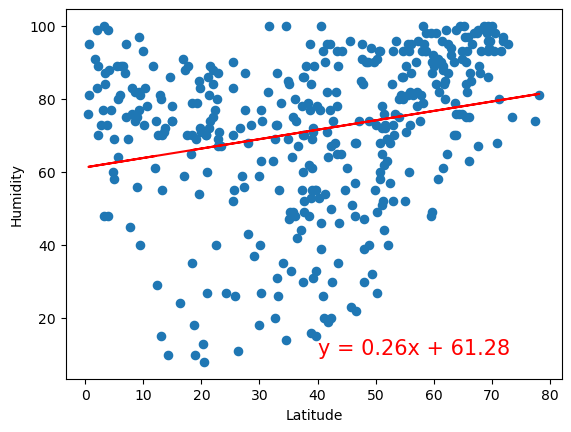

In [26]:
# Northern Hemisphere
# YOUR CODE HERE

humidityNorthern =  northern_hemi_df["Humidity"]
nh_slope, nh_int, nh_r, nh_p, nh_std_err = stats.linregress(lat, humidityNorthern)

nHFit = nh_slope * lat + nh_int
regressValuesNorthernHumidity = lat * nh_slope + nh_int

print(f"The r-value is {nh_r**2}")
northern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity",s=35)
plt.xlabel("Latitude")
line_eq_northern_humidity = "y = " + str(round(nh_slope,2)) + "x + " + str(round(nh_int,2))
plt.plot(lat, nHFit, color='r')
plt.annotate(line_eq_northern_humidity,(40,10),fontsize=15, color="red")

plt.show()

The r-value is 0.0002808747046324618


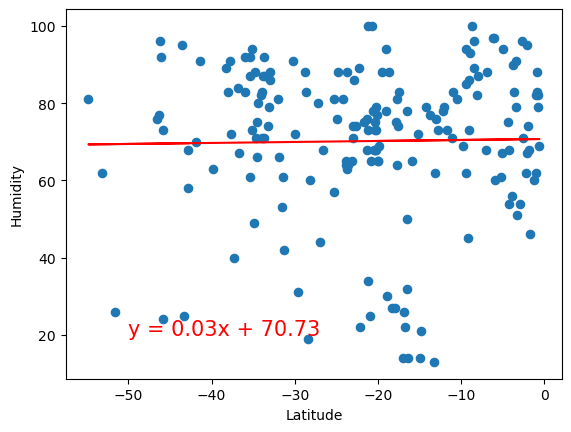

In [27]:
# Southern Hemisphere
# YOUR CODE HERE

humiditySouthern =  southern_hemi_df["Humidity"]
sh_slope, sh_int, sh_r, sh_p, sh_std_err = stats.linregress(latSouthern, humiditySouthern)

sHFit = sh_slope * latSouthern + sh_int
regressValuesSouthernHumidity = latSouthern * sh_slope + sh_int

print(f"The r-value is {sh_r**2}")
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity",s=35)
plt.xlabel("Latitude")
line_eq_southern_humidity = "y = " + str(round(sh_slope,2)) + "x + " + str(round(sh_int,2))
plt.plot(latSouthern, sHFit, color='r')
plt.annotate(line_eq_southern_humidity,(-50,20),fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a weak correlation between latitude and humidity in both the northern and southern hemispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.024026517125811043


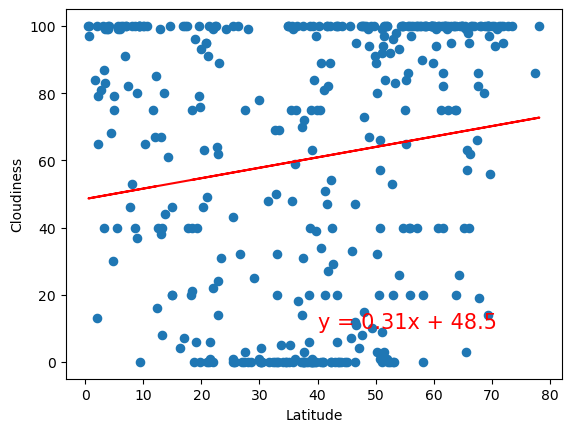

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
cloudyNorthern =  northern_hemi_df["Cloudiness"]
nc_slope, nc_int, nc_r, nc_p, nc_std_err = stats.linregress(lat, cloudyNorthern)

nCFit = nc_slope * lat + nc_int
regressValuesNorthernCloudy = lat * nc_slope + nc_int

print(f"The r-value is {nc_r**2}")
northern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness",s=35)
plt.xlabel("Latitude")
line_eq_northern_cloudiness = "y = " + str(round(nc_slope,2)) + "x + " + str(round(nc_int,2))
plt.plot(lat, nCFit, color='r')
plt.annotate(line_eq_northern_cloudiness,(40,10),fontsize=15, color="red")

plt.show()

The r-value is 0.020567354299943663


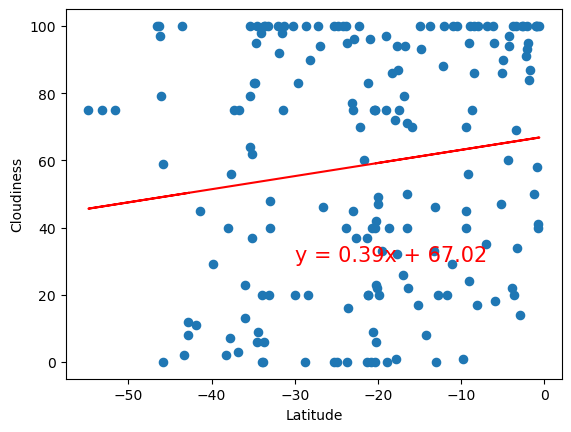

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
cloudySouthern =  southern_hemi_df["Cloudiness"]
sc_slope, sc_int, sc_r, sc_p, sc_std_err = stats.linregress(latSouthern, cloudySouthern)

sCFit = sc_slope * latSouthern + sc_int
regressValuesSouthernCloudy = latSouthern * sc_slope + sc_int

print(f"The r-value is {sc_r**2}")
southern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness",s=35)
plt.xlabel("Latitude")
line_eq_southern_cloudiness = "y = " + str(round(sc_slope,2)) + "x + " + str(round(sc_int,2))
plt.plot(latSouthern, sCFit, color='r')
plt.annotate(line_eq_southern_cloudiness,(-30,30),fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a weak correlation between cloudiness and latitude in both the northern and southern hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.030396762354449484


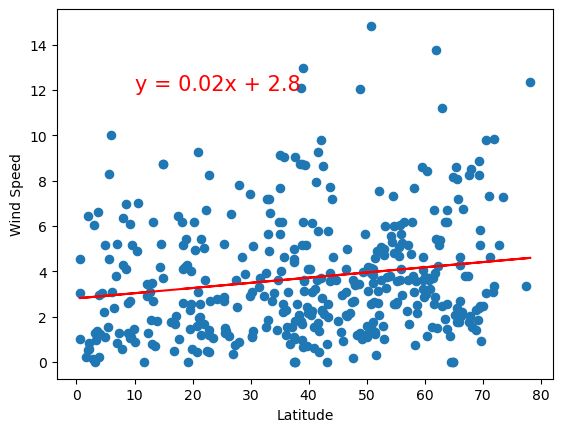

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
windNorthern =  northern_hemi_df["Wind Speed"]
nw_slope, nw_int, nw_r, nw_p, nw_std_err = stats.linregress(lat, windNorthern)

nWFit = nw_slope * lat + nw_int
regressValuesNorthernWind = lat * nw_slope + nw_int

print(f"The r-value is {nw_r**2}")
northern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed",s=35)
plt.xlabel("Latitude")
line_eq_northern_wind = "y = " + str(round(nw_slope,2)) + "x + " + str(round(nw_int,2))
plt.plot(lat, nWFit, color='r')
plt.annotate(line_eq_northern_wind,(10,12),fontsize=15, color="red")

plt.show()

The r-value is 0.06223904070051575


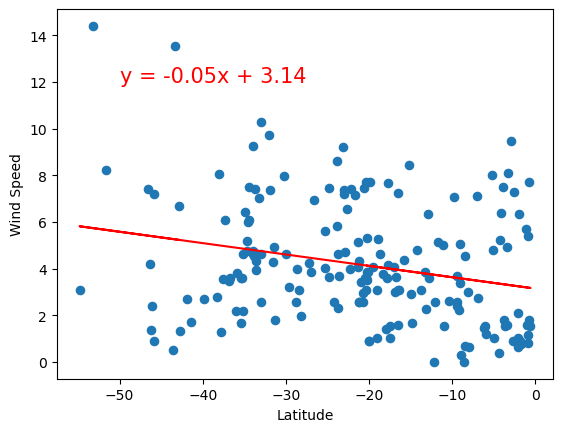

In [32]:
# Southern Hemisphere
# YOUR CODE HERE
windSouthern =  southern_hemi_df["Wind Speed"]
sw_slope, sw_int, sw_r, sw_p, sw_std_err = stats.linregress(latSouthern, windSouthern)

sWFit = sw_slope * latSouthern + sw_int
regressValuesSouthernWind = latSouthern * sw_slope + sw_int

print(f"The r-value is {sw_r**2}")
southern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed",s=35)
plt.xlabel("Latitude")
line_eq_southern_wind = "y = " + str(round(sw_slope,2)) + "x + " + str(round(sw_int,2))
plt.plot(latSouthern, sWFit, color='r')
plt.annotate(line_eq_southern_wind,(-50,12),fontsize=15, color="red")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a weak correlation between wind speed and latitude in both the northern and southern hemispheres